In [1]:
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import pandas as pd
import psycopg2
import calendar
import random
import seaborn as sns
import numpy as np
import itertools
import warnings
warnings.filterwarnings("ignore")

In [2]:
# SoftTouch Lenses complete database
conn = psycopg2.connect(
host = "shopify-merchant-dump.ccm9mnr5avgs.ap-south-1.rds.amazonaws.com",
  user = "toffee_coffee_roasters_69e3f806d0674953afe3d3fb2f724c7c",
  password = "toffee_coffee_roasters_69e3f806d0674953afe3d3fb2f724c7c_password",
  database = "toffee_coffee_roasters_69e3f806d0674953afe3d3fb2f724c7c_db",
  port = '5432'
)

# conn = psycopg2.connect(
# host = "shopify-merchant-dump.ccm9mnr5avgs.ap-south-1.rds.amazonaws.com",
#   user = "toffee_coffee_roasters_69e3f806d0674953afe3d3fb2f724c7c",
#   password = "toffee_coffee_roasters_69e3f806d0674953afe3d3fb2f724c7c_password",
#   database = "toffee_coffee_roasters_69e3f806d0674953afe3d3fb2f724c7c_db",
#   port = '5432'
# )

In [3]:
query1 = """select o.id as order_id,
            o.created_at::date as order_date,
            o.customer_id as user_id,
            oli.product_id as product_id,
            oli.name as product_name,
            o.total_price as order_amount,
            CASE
        WHEN cancelled_at IS NOT NULL THEN 'Cancelled'
         ELSE 'Delivered'
     END as order_status,
            oli.quantity as quantity,
            oli.price as sp
            from orders o
            join order_line_item oli on oli.order_id = o.id"""

In [4]:
data = pd.read_sql(query1, conn)

In [5]:
data["order_date"] = pd.to_datetime(data["order_date"])
data[data["product_id"] == np.nan]
data = data.dropna()
data['WeekCount']=data['order_date'].dt.strftime('%Y-w%W')
data=data.sort_values('order_date')
WeekList=data['WeekCount'].unique()
data = data[data['order_status'] != 'cancelled']

In [75]:
data[data["order_date"]=="2021-01-04"]

,order_id,order_date,user_id,product_id,product_name,order_amount,order_status,quantity,sp,WeekCount,TrxnRank,New,Repeat,ordervalue,AOVContribution,DeltaDaysinOrders,DeltaOrderValues
3188,2550091612298,2021-01-04,3.695753e+12,5.320286e+12,Baba Budangiri Estate Coffee - Pour Over / 250 gm,385.0,Delivered,1,550.0,2021-w01,1.0,1,0,550.0,0.008682,NaN,NaN
3189,2549868331146,2021-01-04,3.695570e+12,5.321648e+12,Amrut - Whiskey Barrel Aged Coffee - Pour Over...,1599.0,Delivered,1,1599.0,2021-w01,1.0,1,0,1599.0,0.025241,NaN,NaN
3190,2549888057482,2021-01-04,3.695592e+12,5.320286e+12,Baba Budangiri Estate Coffee - Pour Over / 250 gm,385.0,Delivered,1,550.0,2021-w01,1.0,1,0,550.0,0.008682,NaN,NaN
3191,2549920891018,2021-01-04,3.619497e+12,5.321622e+12,Peaberry Coffee - Medium Roast - French Press ...,475.0,Delivered,1,630.0,2021-w01,3.0,0,1,630.0,0.009945,45.0,969.0
3192,2549924790410,2021-01-04,3.695628e+12,5.320325e+12,Mysore Nuggets - Speciality Blend - French Pre...,504.0,Delivered,1,630.0,2021-w01,1.0,1,0,630.0,0.009945,NaN,NaN
3193,2550012215434,2021-01-04,3.695682e+12,5.320258e+12,Thippanahalli Estate Coffee - Whole Beans / 25...,410.0,Delivered,1,585.0,2021-w01,1.0,1,0,585.0,0.009234,NaN,NaN
3194,2550065070218,2021-01-04,3.695727e+12,5.320286e+12,Baba Budangiri Estate Coffee - Espresso / 250 gm,385.0,Delivered,1,550.0,2021-w01,1.0,1,0,550.0,0.008682,NaN,NaN
3195,2550123659402,2021-01-04,3.695789e+12,5.321648e+12,Amrut - Whiskey Barrel Aged Coffee - French Pr...,1599.0,Delivered,1,1599.0,2021-w01,1.0,1,0,1599.0,0.025241,NaN,NaN
3196,2550242312330,2021-01-04,3.695903e+12,5.321692e+12,Cabernet Sauvignon - Wine Barrel Aged Coffee -...,1020.0,Delivered,1,1699.0,2021-w01,1.0,1,0,1699.0,0.026819,NaN,NaN
3197,2550158885002,2021-01-04,3.695697e+12,5.321648e+12,Amrut - Whiskey Barrel Aged Coffee - Pour Over...,960.0,Delivered,1,1599.0,2021-w01,1.0,1,0,1599.0,0.025241,NaN,NaN


In [6]:
WeekList = WeekList.tolist()
output_list = []

for i in range(len(WeekList) - 1):
    output_list.append(WeekList[i])
    current_week = int(WeekList[i].split('-w')[1])
    next_week = int(WeekList[i + 1].split('-w')[1])
    missing_weeks = next_week - current_week - 1
    for j in range(1, missing_weeks + 1):
        missing_week = current_week + j
        output_list.append(f'{WeekList[i][:5]}w{missing_week:02d}')

output_list.append(WeekList[-1])

In [7]:
orderuserlevel=data.groupby(['order_id','user_id']).agg(
          order_date=pd.NamedAgg(column='order_date', aggfunc='min'),

    ).reset_index()
orderuserlevel=orderuserlevel.sort_values('order_date')
orderuserlevel['TrxnRank'] = orderuserlevel.groupby('user_id')['order_date'].rank(method='first')
orderuserlevel


data=pd.merge(data,
         orderuserlevel[['order_id','TrxnRank']],
         on="order_id",
         how ='left')
data['New']=0
data['Repeat']=0
data.loc[data['TrxnRank']==1,'New']=1
data.loc[data['TrxnRank']>1,'Repeat']=1

#AOV Contribution
data['ordervalue']=data['quantity']*data['sp']
data['AOVContribution']=data['ordervalue']/data["order_id"].nunique()
data['DeltaDaysinOrders']=(data.groupby('user_id').order_date.shift() - data.order_date).dt.days.abs()
data['DeltaOrderValues']=(data.groupby('user_id').ordervalue.shift() - data.ordervalue)

In [8]:
Weekly_Stats = {}
productsegstats_weekly = {}
user_cohort_labels = ['New Users', 'Churned Users', 'Recent & Loyal Users', 'Champion Users', 'Repeat Churned Users']
user_cohort_var_list = ['Users']#, 'Orders', 'Recency', 'AOVContribution', 'OrderValue','MeanDaysDelta', 'MeanOVDelta', 'Maturity', 'Frequency', 'AOV'
product_cohort_labels=['Hero Products', 'High Value & Slow Moving Products', 'Low Value & Slow Moving Products', 'New Business Products', 'High Repeat Products']
product_cohort_var_list=['ProductCount'] #'Orders','Users','AverageSellingPrice','QuantityperCart','CartPenetration','NewUserRatio','NewOrders','ASPXQpC','AOVContribution','ProductCountMix','OrdersMix','UsersMix','AOVContribution(%)','OrderPerSKU'
final_stats = pd.DataFrame()
avg_delta_days = data["DeltaDaysinOrders"].mean()

for x in output_list:
  x3 = data[data['WeekCount'] <= x]
  try:
    userweeklydata = x3.groupby("user_id").agg(
          Last_Date=pd.NamedAgg(column='order_date', aggfunc= lambda x: np.min(np.sort(x)[-2:])),
          First_Date=pd.NamedAgg(column='order_date', aggfunc='min'),
          OrdersCount=pd.NamedAgg(column='order_id', aggfunc='nunique'),
          Frequency=pd.NamedAgg(column='order_id', aggfunc='nunique'),
          Order_Value=pd.NamedAgg(column='ordervalue', aggfunc='sum'),
          #Mean_Days_Delta=pd.NamedAgg(column='DeltaDaysinOrders', aggfunc='mean'),
          #Mean_OV_Delta=pd.NamedAgg(column='DeltaOrderValues', aggfunc='mean')
          ).reset_index()

    globalmaxdateweek=x3['order_date'].max()
    userweeklydata['Recency']=globalmaxdateweek-userweeklydata['Last_Date']
    userweeklydata['Recency']=userweeklydata['Recency'].dt.days.abs()
    userweeklydata['MaturityAge']=np.nan
    userweeklydata.loc[userweeklydata['Frequency']>1,"MaturityAge"]=(userweeklydata['Last_Date']-userweeklydata['First_Date']).dt.days.abs()
    #userweeklydata['Mean_Days_Delta']=userweeklydata['Mean_Days_Delta'].fillna(0)
    #userweeklydata['Mean_OV_Delta']=userweeklydata['Mean_OV_Delta'].fillna(0)
    userweeklydata['Customer_AOV']=userweeklydata['Order_Value']/userweeklydata['OrdersCount']

    r_labels, f_labels,AOV_labels, m_labels,DelAOV_labels = range(4, 0, -1), range(1,5), range(1,5),range(1,5),range(1,5)
    #userweeklydata['value_score'] = userweeklydata['Order_Value'].transform(lambda x: pd.qcut(x.rank(method='first'), q = [0, 0.25, 0.5, 0.75, 1], labels = f_labels)).astype('int64')
    userweeklydata['r_score'] = userweeklydata['Recency'].transform(lambda x: pd.qcut(x.rank(method='first'), q = [0, 0.25, 0.5, 0.75, 1], labels = r_labels)).astype('int64')
   # userweeklydata['AOV_score'] = userweeklydata['Customer_AOV'].transform(lambda x: pd.qcut(x.rank(method='first'), q = [0, 0.25, 0.5, 0.75, 1], labels = AOV_labels)).astype('int64')
    userweeklydata['m_score']=0
    userweeklydata.loc[userweeklydata['MaturityAge'].notnull(),'m_score']= userweeklydata.loc[userweeklydata['MaturityAge'].notnull()]['MaturityAge'].transform(lambda x: pd.qcut(x.rank(method='first'), q = [0, 0.25, 0.5, 0.75, 1], labels = m_labels)).astype('int64')
    #userweeklydata['DelAOV'] = userweeklydata['Mean_OV_Delta'].transform(lambda x: pd.qcut(x.rank(method='first'), q = [0, 0.25, 0.5, 0.75, 1], labels = DelAOV_labels)).astype('int64')
    #userweeklydata['SumScore'] = userweeklydata['r_score'] + userweeklydata['m_score'] + userweeklydata['AOV_score']+ userweeklydata['DelAOV'] +userweeklydata['f_score']
    def CohortLables_3(df):
        if ((df['Frequency']==1) & (df['r_score']>2)):
            return "New Users"
        elif ((df['Frequency'] == 1) & (df['r_score'] <= 2)):
            return 'Churned Users'
        elif ((df['Frequency'] > 1) & (df['m_score'] < 3) & (df['r_score'] >2)):
            return 'Recent & Loyal Users'
        elif ((df['Frequency'] > 1) & (df['m_score'] >=2) & (df['Recency'] <= avg_delta_days)):
            return 'Champion Users'
        else:
            return 'Repeat Churned Users'
    userweeklydata['User_Cohort_Label'] = userweeklydata.apply(CohortLables_3, axis=1)
    x3=pd.merge(x3,
         userweeklydata[['user_id','User_Cohort_Label']],
         on="user_id",
         how ='left')

    totalcarts=x3['order_id'].nunique()
    product_level=x3.groupby(['product_name']).agg(
            Carts=pd.NamedAgg(column='order_id', aggfunc='nunique'),
            Quantity=pd.NamedAgg(column='quantity', aggfunc='sum'),
            ASP=pd.NamedAgg(column='sp', aggfunc='mean'),
            NewOrders=pd.NamedAgg(column='New', aggfunc='sum'),
            RepeatOrders=pd.NamedAgg(column='Repeat', aggfunc='sum'),
            Users=pd.NamedAgg(column='user_id', aggfunc='nunique'),
            AOVContribution=pd.NamedAgg(column='AOVContribution', aggfunc='sum'),
    ).reset_index()
    produser=data.groupby(['product_name','user_id']).agg(
        New_user=pd.NamedAgg(column='user_id', aggfunc='nunique')
    ).reset_index()
    produser_newcount=produser.groupby('product_name').agg(
        New_count=pd.NamedAgg(column='New_user', aggfunc='sum')
    ).reset_index()
    data_repeat=data[data['TrxnRank']==2]
    produser_repeatcount=data_repeat.groupby('user_id').agg(
        Repeat_count=pd.NamedAgg(column='user_id', aggfunc='nunique')
    ).reset_index()
    k=pd.merge(produser,produser_repeatcount,on='user_id',how='left')
    k.fillna(0)
    k1=k.groupby('product_name').agg(
        Repeat_count=pd.NamedAgg(column='Repeat_count', aggfunc='sum')
    ).reset_index()
    productlevel=pd.merge(product_level,produser_newcount, on='product_name', how='left')
    productlevel=pd.merge(productlevel,k1,on='product_name',how='left')

    productlevel['NewRepeatConversionRatio']=productlevel['Repeat_count']/productlevel['New_count']
    productlevel=productlevel.sort_values('NewRepeatConversionRatio')
    productlevel['CartPenetration']=productlevel['Carts']/totalcarts
    productlevel['QpC']=productlevel['Quantity']/productlevel['Carts']
    productlevel['ASPXQpC']=productlevel['ASP']*productlevel['QpC']

    CP_labels, NewRatio_labels,ASP_labels, QpC_labels =  range(1,5), range(1,5),range(1,5),range(1,5)
    productlevel['CP_score'] = productlevel['CartPenetration'].transform(lambda x: pd.qcut(x.rank(method='first'), q = [0, 0.25, 0.5, 0.75, 1], labels = CP_labels)).astype('int64')
    productlevel['NewRepeatConversion_score'] = productlevel['NewRepeatConversionRatio'].transform(lambda x: pd.qcut(x.rank(method='first'), q = [0, 0.25, 0.5, 0.75, 1], labels = NewRatio_labels)).astype('int64')
    productlevel['ASP_score'] = productlevel['ASP'].transform(lambda x: pd.qcut(x.rank(method='first'), q = [0, 0.25, 0.5, 0.75, 1], labels = ASP_labels)).astype('int64')
    productlevel['QpC_score'] = productlevel['QpC'].transform(lambda x: pd.qcut(x.rank(method='first'), q = [0, 0.25, 0.5, 0.75, 1], labels = QpC_labels)).astype('int64')
    productlevel['SumScore'] = productlevel['CP_score'] + productlevel['NewRepeatConversion_score'] + productlevel['ASP_score'] + productlevel['QpC_score']
    def ProductCohortLables2(df):
        if ((df['CP_score']>2) and (df['NewRepeatConversion_score']>2)):
            return 'Hero Products'
        elif df['NewRepeatConversion_score'] >2:
            return 'High Repeat Products'
        elif (df['CP_score'] >2):
            return 'New Business Products'
        elif (df['ASP_score'] >3):
            return 'High Value & Slow Moving Products'
        elif (df['ASP_score'] <=3):
            return 'Low Value & Slow Moving Products'
        else:
            return 'Low Value & Slow Moving Products'
    productlevel['Product Cohort Lables'] = productlevel.apply(ProductCohortLables2, axis=1)

    x3=pd.merge(x3,
         productlevel[['product_name','Product Cohort Lables']],
         on="product_name",
         how ='left')


    User_Product_Level=x3.groupby(['User_Cohort_Label','Product Cohort Lables']).agg(
        Order_Value=pd.NamedAgg(column='ordervalue', aggfunc='sum'),
            Users=pd.NamedAgg(column='user_id', aggfunc='nunique'),
        Order_Count=pd.NamedAgg(column='order_id', aggfunc='nunique'),

    ).reset_index()

    Weekly_Stats[x] = User_Product_Level
    x4 = data[data['WeekCount']==x]
    x5 = pd.merge(x4,userweeklydata[['user_id','User_Cohort_Label']], on='user_id', how='left')
    x6 = pd.merge(x5,productlevel[['product_name','Product Cohort Lables']], on='product_name', how='left')
    final_stats = final_stats.append(x6, ignore_index=True)
    final_stats = pd.concat([final_stats, x5], ignore_index=True)

  except:
    pass

In [9]:
#AOV Contribution
final_stats['ordervalue']=final_stats['ordervalue']
final_stats['AOVContribution']=final_stats['ordervalue']/final_stats["order_id"].nunique()
final_stats['DeltaDaysinOrders']=(final_stats.groupby('user_id').order_date.shift() - final_stats.order_date).dt.days.abs()
final_stats['DeltaOrderValues']=(final_stats.groupby('user_id').ordervalue.shift() - final_stats.ordervalue)
weekly_summary_stats = final_stats.groupby(['WeekCount','User_Cohort_Label','Product Cohort Lables']).agg(
            totalorders=pd.NamedAgg(column='order_id', aggfunc='nunique'),
            totalusers=pd.NamedAgg(column='user_id', aggfunc='nunique'),
            totalvalue=pd.NamedAgg(column='ordervalue', aggfunc='sum'),
            quantity=pd.NamedAgg(column='quantity', aggfunc='sum'),
            SKUCounts=pd.NamedAgg(column='product_id', aggfunc='nunique')
      ).reset_index()
newdf=final_stats[final_stats['New']==1].groupby(['WeekCount','User_Cohort_Label','Product Cohort Lables']).agg(
    newusercount=pd.NamedAgg(column='user_id', aggfunc='nunique'),
     ).reset_index()
cancelled_orders = final_stats[final_stats['order_status'] == 'Cancelled'].groupby(['WeekCount','User_Cohort_Label','Product Cohort Lables']).agg(
    CancellationCount=pd.NamedAgg(column='order_id', aggfunc='count')
).fillna(0).reset_index()

delivered_orders = final_stats[final_stats['order_status'] == 'Delivered'].groupby(['WeekCount','User_Cohort_Label','Product Cohort Lables']).agg(
    DeliveryCount=pd.NamedAgg(column='order_id', aggfunc='count')
).fillna(0).reset_index()
weekly_summary_stats = weekly_summary_stats.merge(newdf, on=['WeekCount','User_Cohort_Label','Product Cohort Lables'], how="left")
weekly_summary_stats =weekly_summary_stats.merge(cancelled_orders, on=['WeekCount','User_Cohort_Label','Product Cohort Lables'], how="left")
weekly_summary_stats = weekly_summary_stats.merge(delivered_orders, on=['WeekCount','User_Cohort_Label','Product Cohort Lables'], how="left")
weekly_summary_stats['repeatusercount']=weekly_summary_stats['totalusers']-weekly_summary_stats['newusercount']
weekly_summary_stats['AOV'] = weekly_summary_stats['totalvalue']/ weekly_summary_stats['totalorders']


In [10]:
final_stats["Retention"] = 0
final_stats.loc[(final_stats["DeltaDaysinOrders"] > 0) & (final_stats["DeltaDaysinOrders"] <= 90) , "Retention"] = "Retained"
final_stats.loc[(final_stats["DeltaDaysinOrders"] > 90), "Retention"] = "Not-Retained"
retained_df = final_stats[final_stats['Retention'] == 'Retained'].groupby(['WeekCount','User_Cohort_Label','Product Cohort Lables']).size().reset_index(name='Retained_Users')
weekly_summary_stats = pd.merge(weekly_summary_stats, retained_df, on=['WeekCount','User_Cohort_Label','Product Cohort Lables'], how="left")
weekly_summary_stats.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2104 entries, 0 to 2103
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   WeekCount              2104 non-null   object 
 1   User_Cohort_Label      2104 non-null   object 
 2   Product Cohort Lables  2104 non-null   object 
 3   totalorders            2104 non-null   int64  
 4   totalusers             2104 non-null   int64  
 5   totalvalue             2104 non-null   float64
 6   quantity               2104 non-null   int64  
 7   SKUCounts              2104 non-null   int64  
 8   newusercount           1024 non-null   float64
 9   CancellationCount      119 non-null    float64
 10  DeliveryCount          2101 non-null   float64
 11  repeatusercount        1024 non-null   float64
 12  AOV                    2104 non-null   float64
 13  Retained_Users         1116 non-null   float64
dtypes: float64(7), int64(4), object(3)
memory usage: 246.6+ 

In [11]:
key_metrices = ['WeekCount','User_Cohort_Label','Product Cohort Lables','totalorders', 'totalvalue', 'repeatusercount','newusercount', 'AOV']
weekly_summary_stats = weekly_summary_stats[key_metrices]

weekly_summary_stats = weekly_summary_stats.rename(columns={
    'totalorders':'Total_Orders',
    'totalvalue': 'Total_Value',
    'repeatusercount': 'No_of_Repeat_Users',
    'newusercount': 'No_of_New_Users(First_Time_Users)',
    'AOV': 'Average_Order_Value'
})
weekly_summary_stats=weekly_summary_stats.fillna(0)

In [12]:
weekly_summary_stats["Product Cohort Lables"].unique()

array(['New Business Products', 'High Repeat Products', 'Hero Products',
       'Low Value & Slow Moving Products',
       'High Value & Slow Moving Products'], dtype=object)

In [13]:
weekly_summary_stats

,WeekCount,User_Cohort_Label,Product Cohort Lables,Total_Orders,Total_Value,No_of_Repeat_Users,No_of_New_Users(First_Time_Users),Average_Order_Value
0,2020-w38,Champion Users,New Business Products,52,33800.0,0.0,20.0,650.000000
1,2020-w38,Churned Users,High Repeat Products,1,585.0,0.0,1.0,585.000000
2,2020-w38,Churned Users,New Business Products,290,188370.0,0.0,290.0,649.551724
3,2020-w38,New Users,New Business Products,315,204685.0,0.0,315.0,649.793651
4,2020-w38,Recent & Loyal Users,New Business Products,33,21450.0,0.0,15.0,650.000000
...,...,...,...,...,...,...,...,...
2099,2024-w01,Champion Users,New Business Products,14,10638.0,0.0,0.0,759.857143
2100,2024-w01,New Users,New Business Products,67,18940.0,0.0,67.0,282.686567
2101,2024-w01,Recent & Loyal Users,New Business Products,22,5977.0,20.0,1.0,271.681818
2102,2024-w01,Repeat Churned Users,Hero Products,1,2600.0,0.0,0.0,2600.000000


In [14]:
weekly_summary_stats['Average_Order_Value'] = weekly_summary_stats['Total_Value'] / weekly_summary_stats.groupby('WeekCount')['Total_Orders'].transform('sum')

In [15]:
weekly_summary_stats["key"] = weekly_summary_stats["User_Cohort_Label"] + "<>" + weekly_summary_stats["Product Cohort Lables"] # change

In [16]:
weekly_summary_stats.drop(['User_Cohort_Label', 'Product Cohort Lables'], axis=1, inplace=True)

In [17]:
weekly_summary_stats.set_index("WeekCount", inplace=True)

In [18]:
weekly_summary_stats

,Total_Orders,Total_Value,No_of_Repeat_Users,No_of_New_Users(First_Time_Users),Average_Order_Value,key
WeekCount,,,,,,
2020-w38,52,33800.0,0.0,20.0,48.633094,Champion Users<>New Business Products
2020-w38,1,585.0,0.0,1.0,0.841727,Churned Users<>High Repeat Products
2020-w38,290,188370.0,0.0,290.0,271.035971,Churned Users<>New Business Products
2020-w38,315,204685.0,0.0,315.0,294.510791,New Users<>New Business Products
2020-w38,33,21450.0,0.0,15.0,30.863309,Recent & Loyal Users<>New Business Products
...,...,...,...,...,...,...
2024-w01,14,10638.0,0.0,0.0,87.196721,Champion Users<>New Business Products
2024-w01,67,18940.0,0.0,67.0,155.245902,New Users<>New Business Products
2024-w01,22,5977.0,20.0,1.0,48.991803,Recent & Loyal Users<>New Business Products


In [19]:
grouped_dict = {week: group for week, group in weekly_summary_stats.groupby(level='WeekCount')}
for week, df in grouped_dict.items():
    df = df.reset_index(drop=True)
    df.set_index('key', inplace=True)
    grouped_dict[week] = df

In [20]:
grouped_dict

{'2020-w38':                                              Total_Orders  Total_Value  \
 key                                                                      
 Champion Users<>New Business Products                  52      33800.0   
 Churned Users<>High Repeat Products                     1        585.0   
 Churned Users<>New Business Products                  290     188370.0   
 New Users<>New Business Products                      315     204685.0   
 Recent & Loyal Users<>New Business Products            33      21450.0   
 Repeat Churned Users<>New Business Products             4       2600.0   
 
                                              No_of_Repeat_Users  \
 key                                                               
 Champion Users<>New Business Products                       0.0   
 Churned Users<>High Repeat Products                         0.0   
 Churned Users<>New Business Products                        0.0   
 New Users<>New Business Products             

In [21]:
all_combinations = list(itertools.product(user_cohort_labels, product_cohort_labels))
formatted_combinations = [f'{user}<>{product}' for user, product in all_combinations]

In [22]:
formatted_combinations

['New Users<>Hero Products',
 'New Users<>High Value & Slow Moving Products',
 'New Users<>Low Value & Slow Moving Products',
 'New Users<>New Business Products',
 'New Users<>High Repeat Products',
 'Churned Users<>Hero Products',
 'Churned Users<>High Value & Slow Moving Products',
 'Churned Users<>Low Value & Slow Moving Products',
 'Churned Users<>New Business Products',
 'Churned Users<>High Repeat Products',
 'Recent & Loyal Users<>Hero Products',
 'Recent & Loyal Users<>High Value & Slow Moving Products',
 'Recent & Loyal Users<>Low Value & Slow Moving Products',
 'Recent & Loyal Users<>New Business Products',
 'Recent & Loyal Users<>High Repeat Products',
 'Champion Users<>Hero Products',
 'Champion Users<>High Value & Slow Moving Products',
 'Champion Users<>Low Value & Slow Moving Products',
 'Champion Users<>New Business Products',
 'Champion Users<>High Repeat Products',
 'Repeat Churned Users<>Hero Products',
 'Repeat Churned Users<>High Value & Slow Moving Products',
 'Re

In [23]:
for key, df in grouped_dict.items():
    missing_indices = [index for index in formatted_combinations if index not in df.index]
    if missing_indices:
        for missing_index in missing_indices:
            df.loc[missing_index] = 0
    df.sort_index(inplace=True)

In [24]:
# change
averages_dict = {}
weeks = list(grouped_dict.keys())

for i in range(8, len(weeks)):
      append_week = weeks[i]
      week1 = weeks[i-1]
      week1_df = grouped_dict[week1]
      week2 = weeks[i-2]
      week2_df = grouped_dict[week2]
      week3 = weeks[i-3]
      week3_df = grouped_dict[week3]
      week4 = weeks[i-4]
      week4_df = grouped_dict[week4]
      week5 = weeks[i-5]
      week5_df = grouped_dict[week5]
      week6 = weeks[i-6]
      week6_df = grouped_dict[week6]
      week7 = weeks[i-7]
      week7_df = grouped_dict[week7]
      week8 = weeks[i-8]
      week8_df = grouped_dict[week8]
      week1_df.sort_index(inplace=True)
      week2_df.sort_index(inplace=True)
      week3_df.sort_index(inplace=True)
      week4_df.sort_index(inplace=True)
      week5_df.sort_index(inplace=True)
      week6_df.sort_index(inplace=True)
      week7_df.sort_index(inplace=True)
      week8_df.sort_index(inplace=True)
      average_df = (week1_df + week2_df + week3_df + week4_df + week5_df + week6_df + week7_df + week8_df) / 8
      averages_dict[append_week] = average_df

In [25]:
averages_dict

{'2020-w46':                                                     Total_Orders  Total_Value  \
 key                                                                             
 Champion Users<>Hero Products                              2.625     2325.500   
 Champion Users<>High Repeat Products                       0.125      303.750   
 Champion Users<>High Value & Slow Moving Products          0.000        0.000   
 Champion Users<>Low Value & Slow Moving Products           0.000        0.000   
 Champion Users<>New Business Products                     25.750    29873.875   
 Churned Users<>Hero Products                               0.000        0.000   
 Churned Users<>High Repeat Products                        0.125       73.125   
 Churned Users<>High Value & Slow Moving Products           0.000        0.000   
 Churned Users<>Low Value & Slow Moving Products            0.000        0.000   
 Churned Users<>New Business Products                      36.250    23546.250   
 New

In [26]:
for key, df in averages_dict.items():
    missing_indices = [index for index in formatted_combinations if index not in df.index]
    if missing_indices:
        for missing_index in missing_indices:
            df.loc[missing_index] = 0

In [27]:
result_list = []

for key, dataframe in grouped_dict.items():
    sum_result = pd.DataFrame(dataframe.sum(), columns=['sum_result']).T
    sum_result['key'] = key
    sum_result['original_index'] = dataframe.index[0]
    sum_result.set_index('original_index', inplace=True)
    result_list.append(sum_result)

result_df_1= pd.concat(result_list, ignore_index=True)

In [28]:
result_df_melted_1 = pd.melt(result_df_1, id_vars=['key'], var_name='Metric', value_name='Value')
result_df_melted_1.rename(columns={'key': 'WeekCount'}, inplace=True)

In [29]:
result_list = []

for key, dataframe in averages_dict.items():
    sum_result = pd.DataFrame(dataframe.sum(), columns=['sum_result']).T  # Convert sum_result to a DataFrame and transpose
    sum_result['key'] = key
    sum_result['original_index'] = dataframe.index[0]  # Use the first index value
    sum_result.set_index('original_index', inplace=True)
    result_list.append(sum_result)
result_df_2= pd.concat(result_list, ignore_index=True)

In [30]:
result_df_melted_2 = pd.melt(result_df_2, id_vars=['key'], var_name='Metric', value_name='Value')
result_df_melted_2.rename(columns={'key': 'WeekCount'}, inplace=True)

In [31]:
def create_metric_df(data_dict, metric_column):
    curr_week_df = pd.DataFrame()

    for week, dataframe in data_dict.items():
        current_index_list = dataframe.index.tolist()
        current_metric_values = dataframe[metric_column].tolist()

        temp_df = pd.DataFrame({
            'Metric': current_index_list,
            'Value': current_metric_values,
            'WeekCount': [week] * len(current_index_list)
        })
        # curr_week_df = curr_week_df.append(temp_df, ignore_index=True)
        curr_week_df = pd.concat([curr_week_df, temp_df], ignore_index=True)

    curr_week_df = curr_week_df.rename(columns={
        'Metric': 'Metric',
        'Value': 'Value',
        'WeekCount': 'WeekCount'
    })

    return curr_week_df
curr_week_df = create_metric_df(grouped_dict, 'Total_Value')

In [32]:
def create_average_df(data_dict, metric_column):

    avg_week_df = pd.DataFrame()

    for week, dataframe in data_dict.items():
        current_index_list = dataframe.index.tolist()
        current_metric_values = dataframe[metric_column].tolist()

        temp_df = pd.DataFrame({
            'Metric': current_index_list,
            'Value': current_metric_values,
            'WeekCount': [week] * len(current_index_list)
        })
        # avg_week_df = avg_week_df.append(temp_df, ignore_index=True)
        avg_week_df = pd.concat([avg_week_df, temp_df], ignore_index=True)

    avg_week_df = avg_week_df.rename(columns={
        'Metric': 'Metric',
        'Value': 'Value',
        'WeekCount': 'WeekCount'
    })
    return avg_week_df

avg_week_df = create_average_df(averages_dict, 'Total_Value')


In [33]:
current_week_dataframe = pd.concat([result_df_melted_1, curr_week_df], axis=0)
current_week_dataframe = current_week_dataframe.sort_values(by='WeekCount', ascending=True)

In [34]:
current_week_dataframe.rename(columns={'Metric': 'Variables', 'Value' : 'Current Week Value'}, inplace=True)

In [35]:
keys_list = list(averages_dict.keys())

In [36]:
current_week_dataframe = current_week_dataframe[current_week_dataframe['WeekCount'].isin(keys_list)]

In [37]:
last_8_week_dataframe = pd.concat([result_df_melted_2, avg_week_df], axis=0)
last_8_week_dataframe = last_8_week_dataframe.sort_values(by='WeekCount', ascending=True)

In [38]:
last_8_week_dataframe.rename(columns={'Metric': 'Variables', 'Value' : 'Last 8 Week Value'}, inplace=True)

In [81]:
merged_dataframe = pd.merge(current_week_dataframe, last_8_week_dataframe, on=['WeekCount', 'Variables'], how='left')
merged_dataframe = merged_dataframe.fillna(0)

In [82]:
primary_explanatory_vars = ['Total_Orders', 'No_of_Repeat_Users', 'Average_Order_Value', 'No_of_New_Users(First_Time_Users)'] # change
target_vars = ["Total_Value"]

In [83]:
merged_dataframe.loc[merged_dataframe['Variables'].isin(target_vars), 'Tag'] = 'Target_Variable'
merged_dataframe.loc[merged_dataframe['Variables'].isin(primary_explanatory_vars), 'Tag'] = 'Primary_Explanatory'
merged_dataframe.loc[merged_dataframe['Variables'].isin(formatted_combinations), 'Tag'] = 'Secondary_Explanatory'
merged_dataframe['Variables'] = merged_dataframe.apply(lambda row: row['Variables'] + ' (Rs)' if row['Tag'] == 'Secondary_Explanatory' else row['Variables'], axis=1) # change

In [84]:
merged_dataframe[merged_dataframe["WeekCount"] == "2023-w01"]

,WeekCount,Variables,Current Week Value,Last 8 Week Value,Tag
3420,2023-w01,Champion Users<>High Repeat Products (Rs),0.000000e+00,4125.000000,Secondary_Explanatory
3421,2023-w01,Total_Orders,1.220000e+03,889.375000,Primary_Explanatory
3422,2023-w01,Total_Value,1.118748e+06,868706.500000,Target_Variable
3423,2023-w01,Champion Users<>High Value & Slow Moving Produ...,0.000000e+00,975.000000,Secondary_Explanatory
3424,2023-w01,Champion Users<>Hero Products (Rs),7.952000e+04,70320.625000,Secondary_Explanatory
3425,2023-w01,Champion Users<>Low Value & Slow Moving Produc...,6.500000e+02,550.000000,Secondary_Explanatory
3426,2023-w01,New Users<>Hero Products (Rs),1.484100e+05,128975.625000,Secondary_Explanatory
3427,2023-w01,Churned Users<>Hero Products (Rs),0.000000e+00,0.000000,Secondary_Explanatory
3428,2023-w01,No_of_Repeat_Users,9.800000e+01,57.500000,Primary_Explanatory
3429,2023-w01,No_of_New_Users(First_Time_Users),9.670000e+02,696.125000,Primary_Explanatory


In [85]:
merged_dataframe.to_csv("merged_dataframe_new.csv", index=False)

In [86]:
new_df_1 = merged_dataframe[merged_dataframe["Tag"] == "Secondary_Explanatory"]

In [87]:
new_df_1.head(1)

,WeekCount,Variables,Current Week Value,Last 8 Week Value,Tag
0,2020-w46,New Users<>Hero Products (Rs),11560.0,8830.5,Secondary_Explanatory


In [88]:
new_df_1 = new_df_1.assign(User_Cohort_Labels=new_df_1['Variables'].str.split('<>', expand=True)[0],
                           Product_Cohort_Labels=new_df_1['Variables'].str.split('<>', expand=True)[1].str.replace(r'\(Rs\)', '').str.strip())

In [89]:
new_df_1

,WeekCount,Variables,Current Week Value,Last 8 Week Value,Tag,User_Cohort_Labels,Product_Cohort_Labels
0,2020-w46,New Users<>Hero Products (Rs),11560.0,8830.500,Secondary_Explanatory,New Users,Hero Products
1,2020-w46,New Users<>High Value & Slow Moving Products (Rs),0.0,525.000,Secondary_Explanatory,New Users,High Value & Slow Moving Products
2,2020-w46,New Users<>Low Value & Slow Moving Products (Rs),2809.0,7587.625,Secondary_Explanatory,New Users,Low Value & Slow Moving Products
3,2020-w46,New Users<>New Business Products (Rs),139621.0,116825.000,Secondary_Explanatory,New Users,New Business Products
4,2020-w46,Recent & Loyal Users<>Hero Products (Rs),0.0,424.750,Secondary_Explanatory,Recent & Loyal Users,Hero Products
...,...,...,...,...,...,...,...
5000,2024-w01,Champion Users<>High Repeat Products (Rs),0.0,2410.000,Secondary_Explanatory,Champion Users,High Repeat Products
5001,2024-w01,Champion Users<>Hero Products (Rs),12530.0,70025.250,Secondary_Explanatory,Champion Users,Hero Products
5006,2024-w01,Repeat Churned Users<>Low Value & Slow Moving ...,0.0,0.000,Secondary_Explanatory,Repeat Churned Users,Low Value & Slow Moving Products
5008,2024-w01,Churned Users<>Low Value & Slow Moving Product...,0.0,0.000,Secondary_Explanatory,Churned Users,Low Value & Slow Moving Products


In [90]:
merged_dataframe["Difference"] = merged_dataframe['Current Week Value'] - merged_dataframe['Last 8 Week Value']
merged_dataframe["Difference%"] = merged_dataframe['Difference']*100/merged_dataframe['Last 8 Week Value']

In [91]:
merged_dataframe[merged_dataframe["Tag"] == "Target_Variable"]

,WeekCount,Variables,Current Week Value,Last 8 Week Value,Tag,Difference,Difference%
19,2020-w46,Total_Value,187934.0,200625.625,Target_Variable,-12691.625,-6.326024
53,2020-w47,Total_Value,205434.0,167681.125,Target_Variable,37752.875,22.514684
69,2020-w48,Total_Value,238120.0,165149.750,Target_Variable,72970.250,44.184293
96,2020-w49,Total_Value,266119.0,189849.875,Target_Variable,76269.125,40.173387
143,2020-w50,Total_Value,199369.0,217048.250,Target_Variable,-17679.250,-8.145309
...,...,...,...,...,...,...,...
4887,2023-w49,Total_Value,509741.0,562228.625,Target_Variable,-52487.625,-9.335637
4916,2023-w50,Total_Value,341274.0,572234.500,Target_Variable,-230960.500,-40.361163
4948,2023-w51,Total_Value,243651.0,509608.750,Target_Variable,-265957.750,-52.188615
4978,2023-w52,Total_Value,242589.0,468235.750,Target_Variable,-225646.750,-48.190842


In [59]:
top_4_bot_4_df = merged_dataframe.groupby('WeekCount').apply(lambda group: pd.concat([group[group['Tag'] == 'Secondary_Explanatory'].nlargest(4, 'Difference'), group[group['Tag'] == 'Secondary_Explanatory'].nsmallest(4, 'Difference')])).reset_index(drop=True)

In [76]:
top_4_bot_4_df[top_4_bot_4_df["WeekCount"] == "2023-w01"]

,WeekCount,Variables,Current Week Value,Last 8 Week Value,Tag,Difference
912,2023-w01,New Users<>New Business Products (Rs),645175.0,454634.375,Secondary_Explanatory,190540.625
913,2023-w01,Recent & Loyal Users<>New Business Products (Rs),87959.0,67164.250,Secondary_Explanatory,20794.750
914,2023-w01,New Users<>Hero Products (Rs),148410.0,128975.625,Secondary_Explanatory,19434.375
915,2023-w01,Champion Users<>Hero Products (Rs),79520.0,70320.625,Secondary_Explanatory,9199.375
916,2023-w01,Champion Users<>New Business Products (Rs),51505.0,56655.375,Secondary_Explanatory,-5150.375
917,2023-w01,Champion Users<>High Repeat Products (Rs),0.0,4125.000,Secondary_Explanatory,-4125.000
918,2023-w01,New Users<>High Repeat Products (Rs),7690.0,9205.625,Secondary_Explanatory,-1515.625
919,2023-w01,New Users<>High Value & Slow Moving Products (Rs),8740.0,10088.125,Secondary_Explanatory,-1348.125


In [50]:
merged_dataframe.to_csv("merged_dataframe_without_avg.csv", index=False)

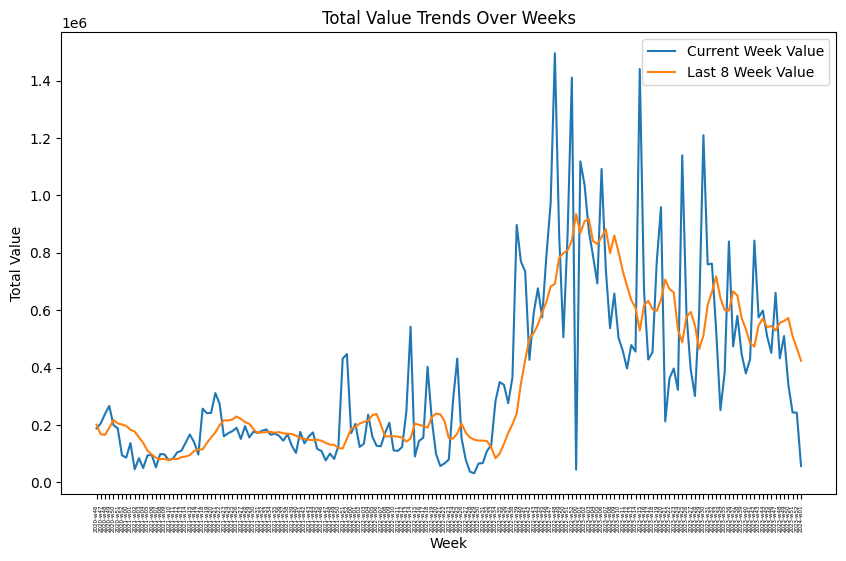

In [51]:
total_value_rows = merged_dataframe[merged_dataframe['Variables'] == 'Total_Value']
# Plot the graph
plt.figure(figsize=(10, 6))

# Plot 'WeekCount' versus 'Current Week Value'
plt.plot(total_value_rows['WeekCount'], total_value_rows['Current Week Value'], label='Current Week Value')

# Plot 'WeekCount' versus 'Last 8 Week Value'
plt.plot(total_value_rows['WeekCount'], total_value_rows['Last 8 Week Value'], label='Last 8 Week Value')

# Set labels and title
plt.xlabel('Week')
plt.ylabel('Total Value')
plt.title('Total Value Trends Over Weeks')
plt.xticks(rotation=90, fontsize=4)
plt.legend()

# Show the plot
plt.show()

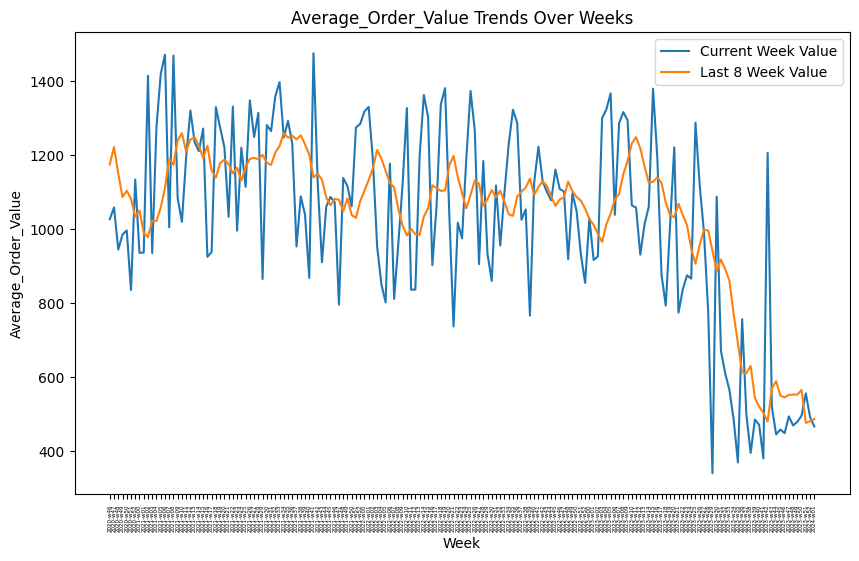

In [52]:
total_value_rows = merged_dataframe[merged_dataframe['Variables'] == 'Average_Order_Value']
# Plot the graph
plt.figure(figsize=(10, 6))

# Plot 'WeekCount' versus 'Current Week Value'
plt.plot(total_value_rows['WeekCount'], total_value_rows['Current Week Value'], label='Current Week Value')

# Plot 'WeekCount' versus 'Last 8 Week Value'
plt.plot(total_value_rows['WeekCount'], total_value_rows['Last 8 Week Value'], label='Last 8 Week Value')

# Set labels and title
plt.xlabel('Week')
plt.ylabel('Average_Order_Value')
plt.title('Average_Order_Value Trends Over Weeks')
plt.xticks(rotation=90, fontsize=4)
plt.legend()

# Show the plot
plt.show()

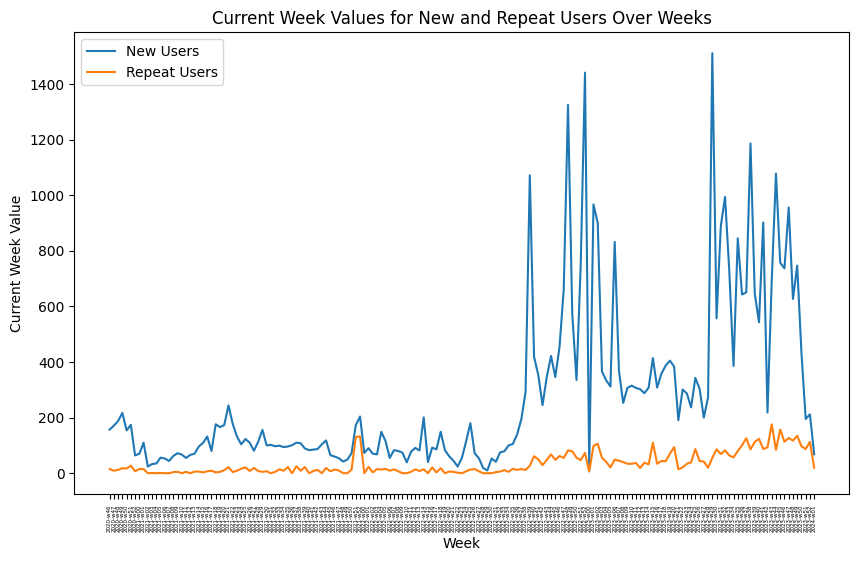

In [53]:
import matplotlib.pyplot as plt

# Filter for 'No_of_New_Users(First_Time_Users)'
new_users_rows = merged_dataframe[merged_dataframe['Variables'] == 'No_of_New_Users(First_Time_Users)']

# Filter for 'No_of_Repeat_Users'
repeat_users_rows = merged_dataframe[merged_dataframe['Variables'] == 'No_of_Repeat_Users']

# Plot the graph
plt.figure(figsize=(10, 6))

# Plot 'WeekCount' versus 'Current Week Value' for New Users
plt.plot(new_users_rows['WeekCount'], new_users_rows['Current Week Value'], label='New Users')

# Plot 'WeekCount' versus 'Current Week Value' for Repeat Users
plt.plot(repeat_users_rows['WeekCount'], repeat_users_rows['Current Week Value'], label='Repeat Users')

# Set labels and title
plt.xlabel('Week')
plt.ylabel('Current Week Value')
plt.title('Current Week Values for New and Repeat Users Over Weeks')
plt.xticks(rotation=90, fontsize=4)
plt.legend()

# Show the plot
plt.show()


In [54]:
# total_value_rows = merged_dataframe[merged_dataframe['Variables'] == 'No_of_Repeat_Users']
# # Plot the graph
# plt.figure(figsize=(10, 6))

# # Plot 'WeekCount' versus 'Current Week Value'
# plt.plot(total_value_rows['WeekCount'], total_value_rows['Current Week Value'], label='Current Week Value')

# # Plot 'WeekCount' versus 'Last 8 Week Value'
# plt.plot(total_value_rows['WeekCount'], total_value_rows['Last 8 Week Value'], label='Last 8 Week Value')

# # Set labels and title
# plt.xlabel('Week')
# plt.ylabel('No_of_Repeat_Users')
# plt.title('No_of_Repeat_Users Trends Over Weeks')
# plt.xticks(rotation=90, fontsize=4)
# plt.legend()

# # Show the plot
# plt.show()

In [55]:
new_df_1

,WeekCount,Variables,Current Week Value,Last 8 Week Value,Tag,User_Cohort_Labels,Product_Cohort_Labels
0,2020-w46,New Users<>Hero Products (Rs),11560.0,8830.500,Secondary_Explanatory,New Users,Hero Products
1,2020-w46,New Users<>High Value & Slow Moving Products (Rs),0.0,525.000,Secondary_Explanatory,New Users,High Value & Slow Moving Products
2,2020-w46,New Users<>Low Value & Slow Moving Products (Rs),2809.0,7587.625,Secondary_Explanatory,New Users,Low Value & Slow Moving Products
3,2020-w46,New Users<>New Business Products (Rs),139621.0,116825.000,Secondary_Explanatory,New Users,New Business Products
4,2020-w46,Recent & Loyal Users<>Hero Products (Rs),0.0,424.750,Secondary_Explanatory,Recent & Loyal Users,Hero Products
...,...,...,...,...,...,...,...
5000,2024-w01,Champion Users<>High Repeat Products (Rs),0.0,2410.000,Secondary_Explanatory,Champion Users,High Repeat Products
5001,2024-w01,Champion Users<>Hero Products (Rs),12530.0,70025.250,Secondary_Explanatory,Champion Users,Hero Products
5006,2024-w01,Repeat Churned Users<>Low Value & Slow Moving ...,0.0,0.000,Secondary_Explanatory,Repeat Churned Users,Low Value & Slow Moving Products
5008,2024-w01,Churned Users<>Low Value & Slow Moving Product...,0.0,0.000,Secondary_Explanatory,Churned Users,Low Value & Slow Moving Products


In [56]:
# # Group the data by Product Cohort Labels
# grouped_data = new_df_1.groupby('Product_Cohort_Lables')

# # Plot the data for each Product Cohort Label
# plt.figure(figsize=(12, 8))

# for label, group in grouped_data:
#     plt.plot(group['WeekCount'], group['Current Week Value'], label=label)

# plt.xlabel('Week Count')
# plt.ylabel('Current Week Value')
# plt.title('Current Week Value for Each Product Cohort Label')
# plt.legend(title='Product Cohort Labels', bbox_to_anchor=(1.05, 1), loc='upper left')
# plt.show()

In [57]:
df_agg = new_df_1.groupby(['WeekCount', 'Product_Cohort_Lables'])['Current Week Value'].sum().reset_index()
pivot_df = df_agg.pivot(index='WeekCount', columns='Product_Cohort_Lables', values='Current Week Value')
ax = pivot_df.plot(kind='bar', stacked=True, figsize=(14, 6))
plt.title('Current Week Value vs Week Count for Product Cohort Lables')
plt.xlabel('Week Count')
plt.ylabel('Current Week Value')
ax.tick_params(axis='x', labelsize=4)
plt.show()

KeyError: ignored

In [ ]:
df_agg_user = new_df_1.groupby(['WeekCount', 'User_Cohort_Lables'])['Current Week Value'].sum().reset_index()
pivot_df_user = df_agg_user.pivot(index='WeekCount', columns='User_Cohort_Lables', values='Current Week Value')
ax_user = pivot_df_user.plot(kind='bar', stacked=True, figsize=(14, 6))
plt.title('Current Week Value vs Week Count for User Cohort Lables')
plt.xlabel('Week Count')
plt.ylabel('Current Week Value')
ax_user.tick_params(axis='x', labelsize=4)
plt.show()

In [ ]:
# merged_dataframe['Variables'] = merged_dataframe.apply(lambda row: row['Variables'].replace('-', '<>') + f'({target_vars[0]})', axis=1)

In [ ]:
merged_dataframe

In [ ]:
averages_dict["2023-w52"].loc["Champions-Hero"]

In [ ]:
grouped_dict["2023-w44"].loc["Champions-Hero"]